In [2]:
from matplotlib import pyplot as plt
# from brokenaxes import brokenaxes
import numpy as np
import os
import sys
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

my_figsize = [10, 8]
my_fontsize = 35
WIDTH = 0.05  # the width of the bars
SHORT = 100001 # 100KB
LONG = 1000000 # 1000KB
METRICS = ['FCT', 'GOODPUT']


os.chdir(sys.path[0])
os.chdir('./')

SCHEMES = ["dctcp/pureincast", "Zeropod/pureincast/ppt_16_bppn_5120"]

workloads = ["incast_10", "incast_20", "incast_30", "incast_40", "incast_50", "incast_60"]
incast_degree = [10, 20, 30, 40, 50, 60]
# SCHEMES = ['scheduled_20', 'scheduled_25', 'scheduled_30', 'scheduled_35', 'scheduled_40']
# SCHEMES = ['VLB/ITER_1/ACC_1', 'VLB/ITER_1/ACC_2', 'VLB/ITER_1/ACC_3', 'VLB/ITER_1/ACC_4', 'VLB/ITER_1/ACC_5', 'NegotiaToR/ITER_1/ACC_1', 'NegotiaToR/ITER_1/ACC_2','NegotiaToR/ITER_1/ACC_3', 'NegotiaToR/ITER_1/ACC_4','NegotiaToR/ITER_1/ACC_5']
# DATA_DIR_TEMP = '../DATA/NegotiaToR/{pias}/{scheme}/ACC_3/DATA_vote_{workload}_{load}_scheduled_{scheduled}/'
# DATA_DIR_TEMP = '../DATA/PIAS/W4/{scheme}/0/DATA_vote_W4_{load}/'
# DATA_DIR_TEMP = '../DATA/PIAS/Benes/{scheme}/ITER_1/ACC_2/DATA_vote_W4_{load}/'

DATA_DIR_TEMP = '../DATA/Zeropod/{scheme}/DATA_zeropod_{workload}/'

data = {}
for scheme in SCHEMES:
    data[scheme] = {}
    for workload in workloads:
        data[scheme][workload] = {}
    
for scheme in SCHEMES:
    for workload in workloads:
        dir_path = DATA_DIR_TEMP.format(scheme=scheme, workload=workload)
        data[scheme][workload]['PATH'] = dir_path
        for metric in METRICS:
            data_path = dir_path + metric + '.txt'
            data[scheme][workload][metric] = np.loadtxt(data_path)

1600
1600
1590
1600
1600
1560
1600
1600
1590
1600
1600
1560
{'dctcp/pureincast': [0.1722098551111273, 1.2843288388968421, 1.3326469678898167, 2.571051199752983, 2.6994392650834254, 1.9060686832976792], 'Zeropod/pureincast/ppt_16_bppn_5120': [0.2500181344566865, 0.3756390695910383, 0.36479559067603695, 0.38365091707648347, 0.6345488680150613, 1.0718470820956227]}


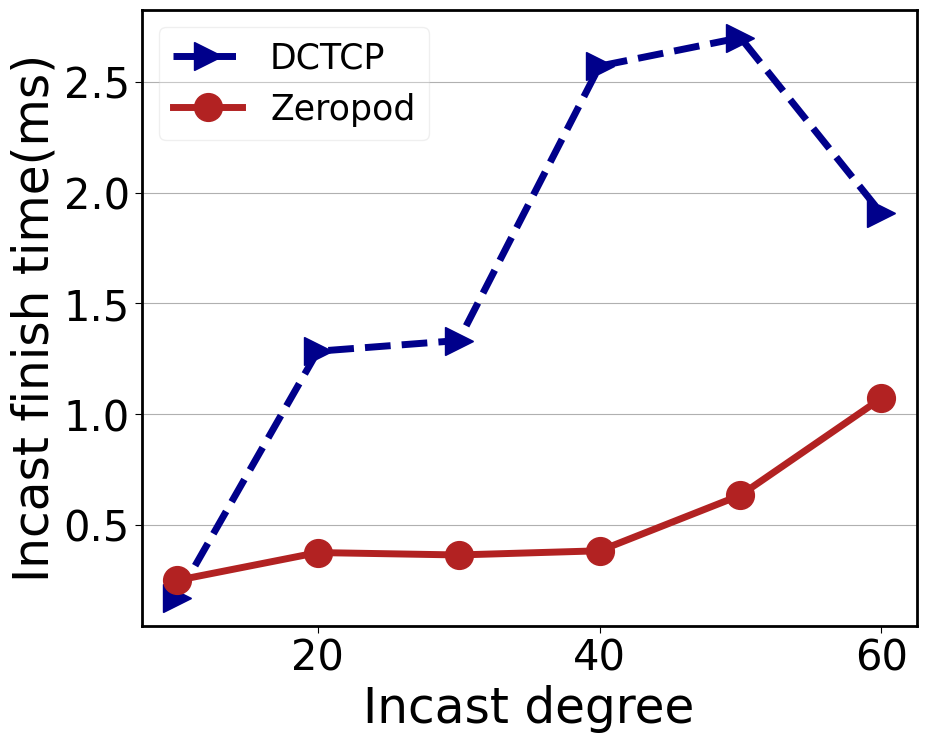

In [3]:
WIDTH = 0.05
def incast_finish_time():
    results = {}
    for i, scheme in enumerate(SCHEMES):
        results[scheme] = []
        for workload in workloads:
            incast_fct = data[scheme][workload]['FCT'][:, 7] # fct
            print(len(incast_fct))
            incast_finish_time = max(incast_fct)
            results[scheme].append(incast_finish_time*1e3)
    



    fig, ax = plt.subplots(figsize=my_figsize)
    # plt.subplots_adjust(left=0.10, right=0.96, bottom=0.15, top=0.9)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['top'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
    ax.spines['right'].set_linewidth('2.0')
    

    
    ax.plot(incast_degree, results[SCHEMES[0]], color = 'darkblue', marker = '>', markersize=20, linestyle = '--', linewidth=5, label = 'DCTCP')
    ax.plot(incast_degree, results[SCHEMES[1]], color = 'firebrick', marker = 'o', markersize=20, linestyle = 'solid', linewidth=5, label = 'Zeropod')
    print(results)
    # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
    # ax.set_ylabel('Goodput\n(normalized)', fontsize=my_fontsize)
    ax.set_ylabel('Incast finish time(ms)', fontsize=my_fontsize)
    # ax.set_xticks(x_tick)
    # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
    ax.set_xlabel("Incast degree", fontsize=my_fontsize)
    # ax.set_xticklabels(labels, fontsize=my_fontsize)
    ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-10, framealpha=0.3)
    ax.tick_params(axis='both', which='both', length=5, labelsize=my_fontsize)
    # ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-5, handlelength = 1.5, borderpad = 0.2,  labelspacing = 0.3, columnspacing = 1.0)

    

    plt.xticks(fontsize=my_fontsize-5)
    ax.tick_params(axis='both', which='both', length=5)
    # plt.ylim((0, 250))
    # plt.yticks(np.arange(-1,1.01,0.2), [1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    # plt.yticks(np.arange(0,1.01,0.2))
    ax.grid(axis="y")
    # plt.yticks([0.2, 0.4, 0.6, 0.8, 1], fontsize=my_fontsize-5)
    plt.yticks(fontsize=my_fontsize-5)
    plt.savefig('../FIGS/Zeropod/incast_finish_time.pdf', bbox_inches='tight')
            
incast_finish_time()